In [1]:
# importing the USA housing dataset

import pandas as pd
df=pd.read_csv("USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [2]:
# This will show the descriptive statistics for the numeric columns

df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [3]:
# Basic things to do so that to get an understanding of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [4]:
df.nunique()

Avg. Area Income                5000
Avg. Area House Age             5000
Avg. Area Number of Rooms       5000
Avg. Area Number of Bedrooms     255
Area Population                 5000
Price                           5000
Address                         5000
dtype: int64

In [5]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [6]:
# Using seaborn heatmap is made which shows the correlation between all the columns in the dataset

import seaborn as sns
sns.heatmap(data=df.corr(),annot=True)

# For a single indepedant variable

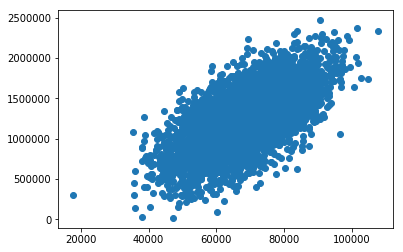

In [7]:
# Sctterplot between average area income and price. 

import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x="Avg. Area Income",y="Price",data=df)
plt.show()

#### From the scatterplot we can get an idea that there is a linear relation between average area income and price. So that indepedant variable can be used to predict price better.

In [8]:
# Mean of the average area income

a=df["Avg. Area Income"].mean()
print(a)

68583.10898395971


In [9]:
# Mean of the price

b=df["Price"].mean()
print(b)

1232072.65414236


In [10]:
# Calling the Linear regression algorithm from sklearn.linear_model and fitting it using the independant variable(x) as 
# average are income and predicting variable (y) as price

from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(pd.DataFrame(df['Avg. Area Income']),df['Price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
# Intercept is also known as constant. If all the x values tends to zero. Intercept is the expected value for y. (i.e)y = mx + c

linreg.intercept_ 

-221579.47820591787

In [12]:
# This decribes the relation between independant variable and dependant variable. How much times the x will give the y.

linreg.coef_ 

array([21.19548317])

In [13]:
# Creating a new column and appending to the existing dataset with the predicted value for average area income using 
# the predict function.

df['predicted']=linreg.predict(pd.DataFrame(df['Avg. Area Income']))
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,predicted
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",1.464425e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",1.458134e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",1.077430e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820,1.121053e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386,1.049772e+06


In [14]:
# TSS - total sum of squares, Summation of difference between each price and mean of price

tss=sum((df["Price"] - b)**2)
tss

623335598953005.4

In [15]:
# sse - sum of squared error, summation of difference between predicted value and existing price

sse=((sum((df['predicted']-df['Price'])**2)))
sse

368229703675947.4

In [16]:
# This is R-squared value which represents how close the data is fitted to the linear regression line. 
# We can also refer this as accuracy

R=1-(sse/tss)
print(R)

0.409259307033884


In [28]:
# RMSE - Root mean squared error. It is also a measure of accuracy

import numpy as np
rmse=np.sqrt(sse/df.shape[0])
rmse

271377.8560147999

In [18]:
# It gives the percentage of error from the actual value

mape=np.sum((abs(df['predicted']-df['Price'])/df['Price'])/(df.shape[0]))
mape

0.22597037945783716

### Using Multiple Independant Variable

In [19]:
linreg2=LinearRegression()
linreg2.fit(df.iloc[:,[0,1,2,3,4]],df["Price"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
df["predicted price2"]=linreg2.predict(df.iloc[:,[0,1,2,3,4]])

In [21]:
tss2=sum((df["Price"] - b)**2)
tss

623335598953005.4

In [22]:
sse2=((sum((df['predicted price2']-df['Price'])**2)))
sse2

51098671566265.164

In [23]:
r2_2=1-(sse2/tss2)
r2_2

0.9180238195089551

In [24]:
mape2=np.mean((abs(df['Price']-df['predicted price2'])/df['Price']))
print(mape2)

0.07624185208181675
